In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
#import numpy as np
#import dateutil
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


# this code written by Paul AG

nyc_crime_sqft_rent_by_boro=pd.read_csv("NYC_CRIME_PRICE_SQFT_RENTAL_BY_BORO.csv")

boro=['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']
# Kings is synomous with Brooklyn (same land mass)
county=['New York', 'Bronx', 'Kings', 'Queens', 'Richmond']


In [2]:
# Notes
# [item[0:4] for item in df.iloc[0::12]["Date"].values]
# ax = df.plot.line()
# plt.xticks(df.iloc[0::12,:]["Date"].keys(),[item[0:4] for item in df.iloc[1::12,:]["Date"].values],rotation=90)

In [3]:
nyc_crime_sqft_rent_by_boro.columns

Index(['Date', 'MANHATTAN_Crime_Cnt', 'BROOKLYN_Crime_Cnt', 'QUEENS_Crime_Cnt',
       'BRONX_Crime_Cnt', 'STATEN_ISLAND_Crime_Cnt',
       'Manhattan price per sqft', 'Brooklyn price per sqft',
       'Bronx price per sqft', 'Queens price per sqft',
       'Staten Island price per sqft', 'Manhattan rental price',
       'Brooklyn rental price', 'Bronx rental price', 'Queens rental price',
       'Staten Island rental price'],
      dtype='object')

In [4]:
manhattan_crime_df=pd.DataFrame(nyc_crime_sqft_rent_by_boro, columns=['Date','MANHATTAN_Crime_Cnt'])

In [5]:
manhattan_price_df=pd.DataFrame(nyc_crime_sqft_rent_by_boro, columns=['Date','Manhattan price per sqft'])

In [6]:
manhattan_rent_df=pd.DataFrame(nyc_crime_sqft_rent_by_boro, columns=['Date','Manhattan rental price'])

In [7]:
manhattan_crime_df.head()

,Date,MANHATTAN_Crime_Cnt
0,2011-12,9735
1,2012-01,9784
2,2012-02,9181
3,2012-03,10389
4,2012-04,9964


In [8]:
#yr=[item[0:4] for item in manhattan_crime_df.iloc[0::12]["Date"].values]

In [9]:
yr_df=manhattan_crime_df['Date'].str.split('-', expand=True)

In [11]:
'''yr_df=manhattan_crime_df['Date'].str.split('-', expand=True)
df=manhattan_crime_df.join(yr_df)
df1=df.rename(columns={0:'YR',1:'M'})
df2=df1.groupby(['YR']).mean()
df2=df2.rename(columns={'MANHATTAN_Crime_Cnt':'Manhattan Crime Cnt (Mean)'})'''

"yr_df=manhattan_crime_df['Date'].str.split('-', expand=True)\ndf=manhattan_crime_df.join(yr_df)\ndf1=df.rename(columns={0:'YR',1:'M'})\ndf2=df1.groupby(['YR']).mean()\ndf2=df2.rename(columns={'MANHATTAN_Crime_Cnt':'Manhattan Crime Cnt (Mean)'})"

In [12]:
yr_df.head()

,0,1
0,2011,12
1,2012,01
2,2012,02
3,2012,03
4,2012,04


In [13]:
df=manhattan_crime_df.join(yr_df)

In [14]:
df1=df.rename(columns={0:'YR',1:'M'})

In [15]:
df2=df1.groupby(['YR']).sum()

In [16]:
df2=df2.rename(columns={'MANHATTAN_Crime_Cnt':'Manhattan Crime Cnt'})

In [18]:
df2.head()

,Manhattan Crime Cnt
YR,
2011,9735
2012,119956
2013,117883
2014,113398
2015,112890


In [19]:
df2.index

Index(['2011', '2012', '2013', '2014', '2015', '2016', '2017'], dtype='object', name='YR')

In [20]:
manhattan_price_df.head()

,Date,Manhattan price per sqft
0,2011-12,1000.96
1,2012-01,1005.04
2,2012-02,1008.44
3,2012-03,1011.48
4,2012-04,1015.52


In [21]:
yr_df=manhattan_price_df['Date'].str.split('-', expand=True)
price_df=manhattan_price_df.join(yr_df)
price_df1=price_df.rename(columns={0:'YR',1:'M'})
price_df2=price_df1.groupby(['YR']).mean()
price_df2=price_df2.rename(columns={'Manhattan price per sqft':'Manhattan Median Price SQFT (Mean)'})

In [22]:
price_df2.head()

,Manhattan Median Price SQFT (Mean)
YR,
2011,1000.960000
2012,1033.476667
2013,1133.230000
2014,1283.083333
2015,1375.263333


In [23]:
manhattan_rent_df.head()

,Date,Manhattan rental price
0,2011-12,3034.115385
1,2012-01,3016.884615
2,2012-02,3021.461538
3,2012-03,3022.807692
4,2012-04,3040.461538


In [24]:
yr_df=manhattan_rent_df['Date'].str.split('-', expand=True)
rent_df=manhattan_rent_df.join(yr_df)
rent_df1=rent_df.rename(columns={0:'YR',1:'M'})
rent_df2=rent_df1.groupby(['YR']).mean()
rent_df2=rent_df2.rename(columns={'Manhattan rental price':'Manhattan Median Rental Price (Mean)'})

In [25]:
rent_df2.head()

,Manhattan Median Rental Price (Mean)
YR,
2011,3034.115385
2012,3075.647436
2013,3186.294872
2014,3421.733974
2015,3786.842949


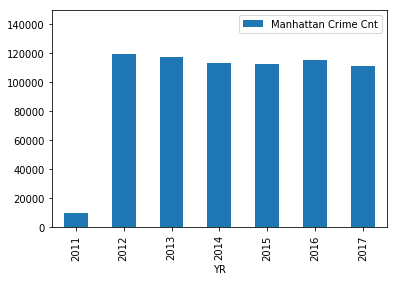

In [29]:
df2.plot.bar(ylim=(0,150000))

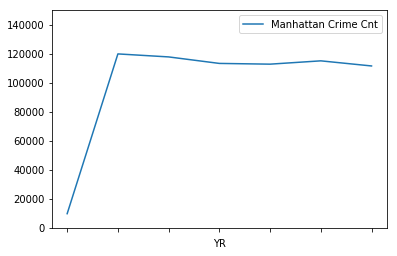

In [31]:
#samething above with line
df2.plot.line(ylim=(0,150000))

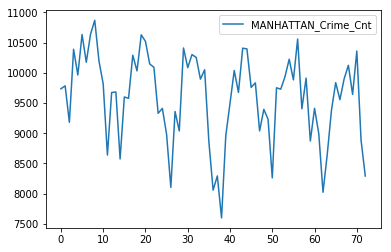

In [32]:
# by month and year
manhattan_crime_df.plot.line()

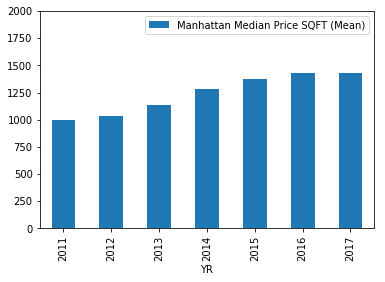

In [33]:
price_df2.plot.bar(ylim=(0,2000))

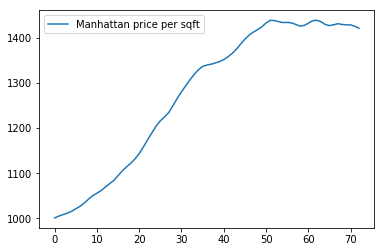

In [34]:
# by month and year
manhattan_price_df.plot.line()

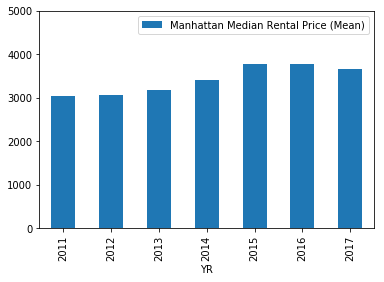

In [35]:
rent_df2.plot.bar(ylim=(0,5000))

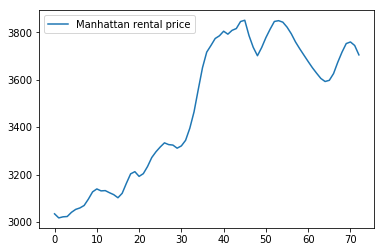

In [36]:
# by month and year
manhattan_rent_df.plot.line()

In [38]:
df.to_csv("\\Users\\Paul-DS\\Downloads\\Manhattan_Crime_Prices_Sqft_by_Boro.csv")